<a href="https://colab.research.google.com/github/mjksill/CP540-online/blob/main/notebooks/Pandas_5_Interpolation_of_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpoltating Data Using Pandas

We can use the `pandas` module in python to carry out interpolation when we are missing data in a dataset. Download the required csv files from myplace [here](https://) (**Note - need to upload files**). For this first example lets use the linear file you have downloaded. 

In [1]:
from google.colab import files
 
 
uploaded = files.upload()

Saving interpolation line.csv to interpolation line.csv


In [2]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['interpolation line.csv']),
                skipinitialspace=True)

print(df)

       x     y
0  -20.0 -34.0
1  -19.0 -32.0
2  -18.0 -30.0
3  -17.0 -28.0
4    NaN   NaN
5  -15.0 -24.0
6  -14.0 -22.0
7    NaN   NaN
8  -12.0 -18.0
9  -11.0 -16.0
10 -10.0 -14.0
11   NaN   NaN
12   NaN   NaN
13  -7.0  -8.0
14  -6.0  -6.0
15  -5.0  -4.0
16  -4.0  -2.0
17  -3.0   0.0
18   NaN   NaN
19   NaN   NaN
20   NaN   NaN
21   NaN   NaN
22   NaN   NaN
23   3.0  12.0
24   4.0  14.0
25   5.0  16.0
26   6.0  18.0
27   7.0  20.0
28   NaN   NaN
29   9.0  24.0
30  10.0  26.0
31  11.0  28.0
32  12.0  30.0
33  13.0  32.0
34  14.0  34.0
35  15.0  36.0
36   NaN   NaN
37   NaN   NaN
38  18.0  42.0
39  19.0  44.0
40  20.0  46.0


We can see in this data set that there are numerous rows missing. We can use `pandas` to simply interpolate it, as long as we know if it's linear or polynomial, and in latters case, which order it is. This example is a set of linear data ($y$ = 2$x$ + 6), so we can set up the code as follows. 

In [3]:
# to interpolate the missing values
a = df.interpolate(method ='linear', limit_direction ='forward')              # Method tells python what type of data it is dealing with, and the limit direction tells it to move forward through the data
print(a)

       x     y
0  -20.0 -34.0
1  -19.0 -32.0
2  -18.0 -30.0
3  -17.0 -28.0
4  -16.0 -26.0
5  -15.0 -24.0
6  -14.0 -22.0
7  -13.0 -20.0
8  -12.0 -18.0
9  -11.0 -16.0
10 -10.0 -14.0
11  -9.0 -12.0
12  -8.0 -10.0
13  -7.0  -8.0
14  -6.0  -6.0
15  -5.0  -4.0
16  -4.0  -2.0
17  -3.0   0.0
18  -2.0   2.0
19  -1.0   4.0
20   0.0   6.0
21   1.0   8.0
22   2.0  10.0
23   3.0  12.0
24   4.0  14.0
25   5.0  16.0
26   6.0  18.0
27   7.0  20.0
28   8.0  22.0
29   9.0  24.0
30  10.0  26.0
31  11.0  28.0
32  12.0  30.0
33  13.0  32.0
34  14.0  34.0
35  15.0  36.0
36  16.0  38.0
37  17.0  40.0
38  18.0  42.0
39  19.0  44.0
40  20.0  46.0


And there we have it, the data has been interpolated and any missing values filled in. We can then plot it to see if it has worked correctly and matches what we expect. 

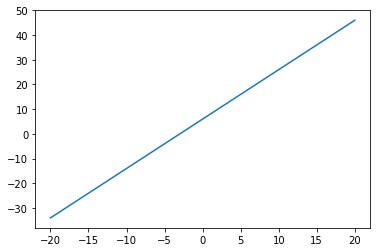

In [4]:
import pylab as plt
plt.plot(a['x'], a['y'])

Perfect! We now have all the data for our straight line over the range we require. We can confirm this by looking at the 'full data' file from myplace.

Lets try another interpolation, this time with a cubic. Use the cubic file from myplace. 

In [5]:
from google.colab import files
 
 
uploaded = files.upload()

Saving interpolation cubic.csv to interpolation cubic.csv


In [6]:
df1 = pd.read_csv(io.BytesIO(uploaded['interpolation cubic.csv']),
                skipinitialspace=True)

print(df1)

       x       y
0  -10.0 -1217.0
1   -9.0  -931.0
2    NaN     NaN
3   -7.0  -515.0
4    NaN     NaN
5   -5.0  -267.0
6    NaN     NaN
7    NaN     NaN
8    NaN     NaN
9   -1.0   -83.0
10   0.0   -67.0
11   1.0   -51.0
12   NaN     NaN
13   3.0     5.0
14   4.0    57.0
15   NaN     NaN
16   NaN     NaN
17   NaN     NaN
18   NaN     NaN
19   NaN     NaN
20  10.0  1083.0


This time as we know it is data from a cubic equation ($y$ = $x^{3}$ + 15$x$ - 67), we must change the method to polynomial, and then set the order of the interpolation to 3. 

       x       y
0  -10.0 -1217.0
1   -9.0  -931.0
2   -8.0  -699.0
3   -7.0  -515.0
4   -6.0  -373.0
5   -5.0  -267.0
6   -4.0  -191.0
7   -3.0  -139.0
8   -2.0  -105.0
9   -1.0   -83.0
10   0.0   -67.0
11   1.0   -51.0
12   2.0   -29.0
13   3.0     5.0
14   4.0    57.0
15   5.0   133.0
16   6.0   239.0
17   7.0   381.0
18   8.0   565.0
19   9.0   797.0
20  10.0  1083.0


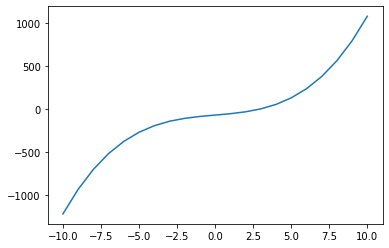

In [7]:
b = df1.interpolate(method='polynomial', order=3, limit_direction ='forward')
print(b)

plt.plot(b['x'], b['y'])

Once again we see it has worked as expected.

To test it's limitaions lets look at a second order polynomial ($y$ = 2$x^{2}$ - 9$x$ + 31), but with irregular intervals in the data. Use the squared file from myplace. 

In [8]:
from google.colab import files
 
 
uploaded = files.upload()

Saving interpolation squared.csv to interpolation squared.csv


In [9]:
df2 = pd.read_csv(io.BytesIO(uploaded['interpolation squared.csv']),
                skipinitialspace=True)

print(df2)

         x          y
0    0.000    31.0000
1    0.020    30.8208
2    0.700    25.6800
3    2.000        NaN
4    4.000        NaN
5    5.000        NaN
6    6.300    53.6800
7    9.700   131.8800
8   11.000        NaN
9   12.010        NaN
10  15.980   397.9008
11  17.500   486.0000
12  21.700   777.4800
13  26.030  1151.8518
14  26.500        NaN
15  26.900        NaN
16  29.004        NaN
17  30.500        NaN
18  37.100  2449.9200
19  40.810        NaN
20  42.000  3181.0000
21  46.300        NaN
22  58.910  6441.5862
23  60.000  6691.0000


As it's a second order polynomial, we change the code to reflect this. 

         x            y
0    0.000    31.000000
1    0.020    30.820800
2    0.700    25.680000
3    2.000    16.944566
4    4.000     4.842324
5    5.000    10.158921
6    6.300    53.680000
7    9.700   131.880000
8   11.000   223.605551
9   12.010   320.980444
10  15.980   397.900800
11  17.500   486.000000
12  21.700   777.480000
13  26.030  1151.851800
14  26.500  1499.854380
15  26.900  1807.227938
16  29.004  2072.546294
17  30.500  2287.252375
18  37.100  2449.920000
19  40.810  2560.549170
20  42.000  3181.000000
21  46.300  4873.132605
22  58.910  6441.586200
23  60.000  6691.000000


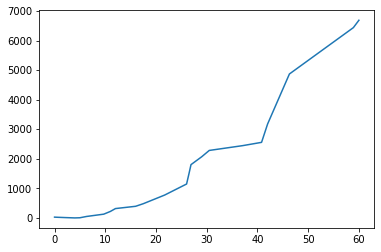

In [10]:
c = df2.interpolate(method='polynomial', order=2)
print(c)

plt.plot(c['x'], c['y'])

Now when we compare this to the graph in the 'full data' file we can see it is not as accurate. This 

Recall the Shomate equation - 

The molar heat capacity is given by
\begin{align*}
C_p(T)
&= A + B t + C t^2 + D t^3 + E t^{-2}
\end{align*}
where $T$ is absolute temperature in kelvin, $t=T/1000$, $C_p$ is molar heat capacity in ${\rm J\,mol^{-1}\,K^{-1}}$, and $A$, $B$, $C$, $D$, and $E$ are constants


The parameters of the Shomate equation for nitrogen are given below (taken from the [NIST webbook](https://webbook.nist.gov/cgi/cbook.cgi?ID=C7727379&Type=JANAFG&Table=on#JANAFG)):

| Temperature / K | $100.$ - $500.$ | $500.$ - $2000.$ | $2000.$ - $6000.$ |
|:--- | ---:| ---:| ---:|
| $A$             |   $ 28.98641$ |    $ 19.50583$ |     $ 35.51872$ |
| $B$             |   $ 1.853978$ |    $ 19.88705$ |     $ 1.128728$ |
| $C$             |   $-9.647459$ |    $-8.598535$ |     $-0.196103$ |
| $D$             |   $ 16.63537$ |    $ 1.369784$ |     $ 0.014662$ |
| $E$             |   $ 0.000117$ |    $ 0.527601$ |     $-4.553760$ |


Say we have some data for Cp in the range of 500 - 2000 Kelvin, but it is not complete. We can use the interpolation fucntion to complete it and then plot it. For the following example use the 'N2 data' file.

In [11]:
from google.colab import files
 
 
uploaded = files.upload()

Saving N2 data.csv to N2 data.csv


In [12]:
df3 = pd.read_csv(io.BytesIO(uploaded['N2 data.csv']),
                skipinitialspace=True)

print(df3)

         T         Cp
0      500  29.581348
1      501  29.585241
2      502  29.589171
3      503  29.593138
4      504  29.597141
...    ...        ...
1496  1996        NaN
1497  1997        NaN
1498  1998  35.972364
1499  1999  35.974164
1500  2000  35.975962

[1501 rows x 2 columns]


Looking at the Shomate euqation, we can see it is a polynomial of the 3rd order, so alter the code accordingly. 

         T         Cp
0      500  29.581348
1      501  29.585241
2      502  29.589171
3      503  29.593138
4      504  29.597141
...    ...        ...
1496  1996  35.968764
1497  1997  35.970564
1498  1998  35.972364
1499  1999  35.974164
1500  2000  35.975962

[1501 rows x 2 columns]


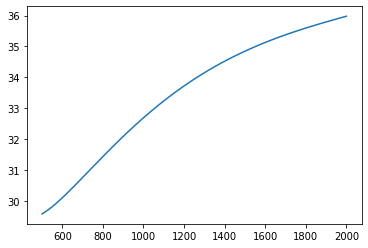

In [13]:
d = df3.interpolate(method='polynomial', order=3)
print(d)

plt.plot(d['T'], d['Cp'])

We can comapre this to the graph in our excel file, and see it matches perfectly. Therefore, we see that this interpolation function can be applied to almost any dataset. 

### Conclusion

In this worksheet we have seen how to use the `pandas` interpolation funcation to find missing data in datasets. 